In [15]:
import torch
import numpy as np
from PIL import Image
from safetensors.torch import load_file
from transformers import ViTForImageClassification, ViTConfig

# تحميل الإعدادات من config.json بدلاً من استخدام النموذج الافتراضي
config = ViTConfig.from_pretrained("/kaggle/input/1111111/config.json")  
model = ViTForImageClassification(config)

# تحميل الـ state_dict من ملف safetensors
model_path = "/kaggle/input/111111/model.safetensors"
state_dict = load_file(model_path)
model.load_state_dict(state_dict)

# تحويل النموذج إلى evaluation mode
model.eval()

# تحميل الصورة ومعالجتها
image_path = "/kaggle/input/555588/555555.png"
image = Image.open(image_path).convert("RGB")

image = image.resize((224, 224))

# تحويل الصورة إلى numpy array ومعالجتها يدويًا
image_np = np.array(image, dtype=np.float32) / 255.0
image_np = np.transpose(image_np, (2, 0, 1))  # تغيير ترتيب الأبعاد (H, W, C) -> (C, H, W)

# تطبيق Normalize (يدويًا)
mean = np.array([0.485, 0.456, 0.406]).reshape(3, 1, 1)
std = np.array([0.229, 0.224, 0.225]).reshape(3, 1, 1)
image_np = (image_np - mean) / std

# تحويل numpy إلى Tensor وإضافة batch dimension
input_tensor = torch.tensor(image_np, dtype=torch.float32).unsqueeze(0)

# تمرير الصورة عبر النموذج
with torch.no_grad():
    output = model(input_tensor)

# استخراج التوقعات
predictions = torch.nn.functional.softmax(output.logits, dim=-1)
predicted_class = torch.argmax(predictions).item()

class_names = ["Infectious", "Eczema", "Acne", "Pigment", "Benign", "Malignant"]
print(f"Predicted Class: {class_names[predicted_class]}")

Predicted Class: Eczema


Infectious: 99.57%
Eczema: 0.36%
Acne: 0.04%
Pigment: 0.01%
Benign: 0.02%
Malignant: 0.01%


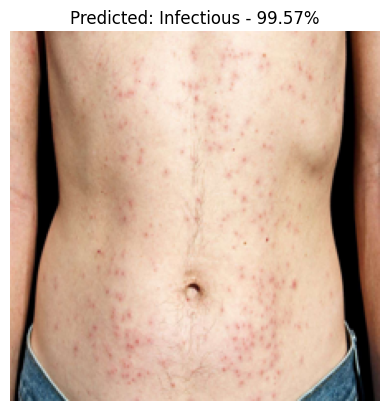

In [17]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from safetensors.torch import load_file
from transformers import ViTForImageClassification, ViTConfig

# تحميل الإعدادات من config.json
config = ViTConfig.from_pretrained("/kaggle/input/1111111/config.json")  
model = ViTForImageClassification(config)

# تحميل الـ state_dict
model_path = "/kaggle/input/111111/model.safetensors"
state_dict = load_file(model_path)
model.load_state_dict(state_dict)

# تحويل النموذج إلى evaluation mode
model.eval()

# تحميل الصورة ومعالجتها
image_path = "/kaggle/input/000000/Hot-Tub-Folliculitis-56ce4a425f9b5879cc60dd82-c3dc38001cb74645be21e3df8b86043e.jpg"
image = Image.open(image_path).convert("RGB")

# **إعادة تحجيم الصورة إلى 224x224**
image_resized = image.resize((224, 224))

# تحويل الصورة إلى numpy array
image_np = np.array(image_resized, dtype=np.float32) / 255.0

# تغيير ترتيب الأبعاد من (H, W, C) إلى (C, H, W)
image_np = np.transpose(image_np, (2, 0, 1))

# تطبيق Normalize (يدويًا)
mean = np.array([0.485, 0.456, 0.406]).reshape(3, 1, 1)
std = np.array([0.229, 0.224, 0.225]).reshape(3, 1, 1)
image_np = (image_np - mean) / std

# تحويل numpy إلى Tensor وإضافة batch dimension
input_tensor = torch.tensor(image_np, dtype=torch.float32).unsqueeze(0)

# تمرير الصورة عبر النموذج
with torch.no_grad():
    output = model(input_tensor)

# استخراج التوقعات
predictions = torch.nn.functional.softmax(output.logits, dim=-1)
predicted_class = torch.argmax(predictions).item()

# **طباعه الفئات مع الاحتمالات**
class_names = ["Infectious", "Eczema", "Acne", "Pigment", "Benign", "Malignant"]
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {predictions[0][i].item()*100:.2f}%")

# **عرض الصورة مع الفئة المتوقعة**
plt.imshow(image_resized)
plt.title(f"Predicted: {class_names[predicted_class]} - {predictions[0][predicted_class].item()*100:.2f}%")
plt.axis('off')  # إخفاء المحاور
plt.show()
